# UCI Adult Income Dataset - Exploratory and Descriptive Analysis

In this notebook, we carry out an in-depth exploratory and descriptive analysis of the UCI Adult Income Dataset, a widely used dataset for income prediction tasks based on individual demographic and employment attributes.

This phase of analysis is essential for uncovering patterns, detecting potential biases, and gaining intuition about the dataset’s structure before applying any modelling procedures. We examine the distribution of key numerical and categorical variables, investigate relationships between demographic features and income levels, and use visualizations to summarize insights. Particular focus is placed on income disparities across **age groups**, **geographical regions**, **races**, and **education-occupation combinations**, helping lay a solid foundation for downstream modeling and policy-relevant interpretation.

We begin our analysis by importing the core Python libraries required for **data handling**, **numerical computation**, **visualization**, and **directory management**:

- `pandas`: Enables efficient manipulation, filtering, and aggregation of structured tabular data, forming the backbone of our analysis pipeline.

- `numpy`: Provides support for fast numerical operations, array-based computation, and statistical routines.

- `os`: Facilitates interaction with the file system, allowing us to construct flexible and portable directory paths for data and output management.

- `plotly.express`: A high-level graphing library that enables the creation of interactive, publication-quality visualizations, which we use extensively to uncover patterns and present insights throughout the notebook.

In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import plotly.express as px

## Define and Create Directory Paths

To ensure reproducibility andorganized storage, we programmatically create directories if they don't already exist for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.

In [3]:
# Get working directory
current_dir = os.getcwd()
# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)
# Define paths to the data folders
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
# Define paths to results folder
results_dir = os.path.join(project_root_dir, 'results')
# Define paths to docs folder
docs_dir = os.path.join(project_root_dir, 'docs')

# Create directories if they do not exist
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## Loading the Cleaned Dataset

We load the cleaned version of the UCI Adult Income Dataset from the processed data directory into a Pandas DataFrame. The `head(10)` function shows the first ten records, giving a glimpse into the data columns such as `age`, `workclass`, `education_num`, etc.

In [4]:
adult_data_filename = os.path.join(processed_dir, "adult_cleaned.csv")
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,secondary-school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,secondary-school graduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


## Dataset Dimensions and Data Types

Here, we examine the structure of the dataset:

- There are *32,513* entries and *16* variables.
- The dataset includes both **numerical** (e.g., `age`, `hours_per_week`) and **categorical** variables (e.g., `sex`, `education_level`).

Understanding data types and null entries is essential before proceeding with analysis.

In [5]:
adult_df.shape

(32513, 16)

In [6]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32513 non-null  int64 
 1   workclass           32513 non-null  object
 2   fnlwgt              32513 non-null  int64 
 3   education_num       32513 non-null  int64 
 4   marital_status      32513 non-null  object
 5   relationship        32513 non-null  object
 6   race                32513 non-null  object
 7   sex                 32513 non-null  object
 8   capital_gain        32513 non-null  int64 
 9   capital_loss        32513 non-null  int64 
 10  hours_per_week      32513 non-null  int64 
 11  income              32513 non-null  object
 12  education_level     32513 non-null  object
 13  occupation_grouped  32513 non-null  object
 14  native_region       32513 non-null  object
 15  age_group           32513 non-null  object
dtypes: int64(6), object(10

## Summary Statistics: Numerical Variables

In [7]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.590256,1.897942e+05,10.081629,1079.239812,87.432719,40.440962
std,13.638932,1.055788e+05,2.572015,7390.625650,403.243596,12.350184
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


This summary provides a snapshot of key distribution characteristics. We see that:

- Age ranges from 17 to 90, with a mean of 38.6 years. It is slightly right-skewed (positively skewed). While the average age is approximately 38.6 years, an examination of the percentiles reveals that the majority of individuals are clustered in the younger to middle-age range, with fewer observations in the older age brackets. This skewed age distribution might suggest labor force participation is concentrated in specific age groups, which could reflect broader demographic or economic realities.
- Capital gains/losses are highly skewed, with most values at 0 (the 75th percentile is 0). This indicates that a small number of individuals report very large gains or losses, especially evident in the capital gain variable which reaches up to $99,999. These variables act as proxies for wealth-related income that goes beyond regular wages or salaries. Individuals with non-zero values for capital gains or losses often represent a distinct socioeconomic subset of the population — typically more financially literate, or with access to investment assets. The stark inequality in their distributions mirrors real-world disparities in asset ownership and investment returns.
- The dataset has individuals working anywhere from 1 to 99 hours per week, with a median of 40. This aligns with the standard full-time work week in many countries (8 hours per day for 5 working days). The mean is slightly above that at 40.4 hours, suggesting a mild right skew, with a small subset of individuals working significantly longer hours. The mode is also 40, further reinforcing the prevalence of full-time work. A non-trivial number of individuals report working very few hours, possibly due to part-time work, unemployment, or semi-retirement. On the other extreme, some report working more than 45 hours per week, which may indicate multiple jobs, weekend-work, self-employment, or informal labor, and could reflect socioeconomic necessity.


## Summary Statistics: Categorical Variables

In [8]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_grouped,native_region,age_group
count,32513,32513,32513,32513,32513,32513,32513,32513,32513,32513
unique,6,4,5,5,2,2,7,5,6,7
top,private,married,male spouse,white,male,<=50k,secondary-school graduate,white collar,north america,26-35
freq,22650,14984,13178,27771,21758,24677,10484,16532,30018,8501


In [9]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696644
government       0.133793
self-employed    0.112447
unknown          0.056470
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [10]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460862
single                   0.327684
divorced or separated    0.180912
widowed                  0.030542
Name: proportion, dtype: float64

In [11]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405315
single               0.360686
child                0.155599
female spouse        0.048227
extended relative    0.030173
Name: proportion, dtype: float64

In [12]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854151
black                        0.096023
asian or pacific islander    0.031926
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

In [96]:
adult_df['sex'].value_counts(normalize=True)

sex
male      0.669209
female    0.330791
Name: proportion, dtype: float64

In [97]:
adult_df['education_level'].value_counts(normalize=True)

education_level
secondary-school graduate    0.322456
tertiary                     0.247809
some college                 0.223787
secondary                    0.093932
associate                    0.075324
primary                      0.035155
preschool                    0.001538
Name: proportion, dtype: float64

In [98]:
adult_df['occupation_grouped'].value_counts(normalize=True)

occupation_grouped
white collar    0.508474
blue collar     0.308861
service         0.125704
unknown         0.056685
military        0.000277
Name: proportion, dtype: float64

In [100]:
adult_df['native_region'].value_counts(normalize=True)

native_region
north america      0.923261
asia               0.020638
other              0.017870
central america    0.016117
europe             0.016024
south america      0.006090
Name: proportion, dtype: float64

In [101]:
adult_df['age_group'].value_counts(normalize=True)

age_group
26-35    0.261465
36-45    0.246086
46-60    0.224156
18-25    0.167533
61-75    0.064313
<18      0.029065
76+      0.007382
Name: proportion, dtype: float64

`workclass`

The private sector dominates, employing ~69.7% of the population. The government sector (13.4%) and self-employment (11.2%) also make up substantial portions of the workforce. A small fraction is labeled as "unknown" (5.6%), which may correspond to missing or ambiguous data entries. Tiny proportions are voluntary (0.04%) or unemployed (0.02%), possibly underreported or underrepresented in the sample.

`marital_status`

Married individuals make up the largest group (46.1%), followed by those who are single (32.8%) and divorced or separated (18.1%). Widowed individuals represent a small minority (~3.1%).

`relationship`

The majority are labeled as "male spouse" (40.5%) or "single" (36.1%). Smaller categories include children (15.6%), female spouses (4.8%), and extended relatives (3.0%). The dominance of `male spouse` reflects the dataset’s gendered structure and may point to traditional family roles. The relative scarcity of "female spouse" roles suggests potential gender imbalances in how income-earning is reported within households.

`race`

The dataset is overwhelmingly composed of White individuals (~85.4%). Other racial groups include Black (9.6%), Asian or Pacific Islander (3.2%), American Indian or Eskimo (1.0%), and Other (0.8%). The racial imbalance limits the generalizability of models trained on this data. Smaller racial groups may suffer from limited statistical power, affecting fairness and performance in predictive modeling.

`sex`

Males constitute 66.9% of the dataset, with females making up the remaining 33.1%. This male-skewed distribution could be due to sampling (e.g., primary earners in households), workforce participation patterns, or reporting biases.

`education_level`

Secondary-school graduates form the largest educational group (~32%), highlighting the central role of high school completion in the labor force. Tertiary education holders — those with university or equivalent degrees — account for nearly 25% of the population, representing a substantial segment with advanced qualifications. A notable 22.4% have attended some college without necessarily earning a degree, suggesting that partial post-secondary education is common, yet may not always translate into formal certification. The remaining 20% are distributed among those with only secondary education (9.4%), associate degrees (7.5%), primary school (3.5%), and a very small group with only preschool education (0.15%). It is ecident that the education distribution is skewed toward mid- to high-level education, with relatively few individuals having only basic schooling. This reflects a dataset that largely captures working-age adults in formal labor, which may underrepresent the least-educated populations.

`occupation_grouped`

White-collar occupations are the most prevalent (~51%), followed by blue-collar, service, and unknown. Smaller categories include military, which is marginal. Essentially, slightly over half of individuals in the dataset work in professional, managerial, sales, clerical, or tech-support roles. This suggests the dataset is heavily weighted toward professional and administrative occupations. Nearly a third of the population works in manual labor or skilled trade positions (craft, transport, machine operation, farming, etc.). This indicates a significant segment engaged in physically intensive or technical labor.

`native_region`

The vast majority of individuals are from North America (~92.3%). Smaller proportions are from Central America, Asia, Europe, South America, and a generic Other category. The heavy concentration of North American individuals reflects the U.S. focus of the dataset. 

`age_group`

The largest groups are 26–35 and 36–45, followed by 46–60. These three age groups represent about 73% of the dataset. Very few individuals are under 18 or above 75, consistent with the dataset's focus on the working-age population.

## Income Distribution

Given that `income` is the target variable, most of the analysis hereafter will be based on it. We first of all examine the income distribution in the dataset.

In [85]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


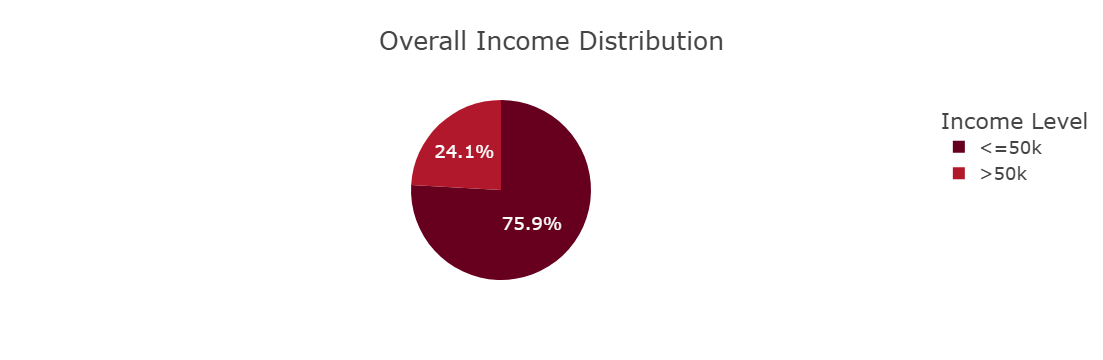

In [91]:
fig = px.pie(adult_df_income, names='income', values='total', title='Overall Income Distribution', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(template="presentation", legend_title=dict(text='Income Level'), paper_bgcolor = "rgba(0, 0, 0, 0)", plot_bgcolor = "rgba(0, 0, 0, 0)")
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_pie_chart.html'))

This pie chart visualizes the overall income split: 76% of individuals earn ≤50K, while 24% earn >50K. This means that nearly 3 out of 4 individuals fall into the lower income bracket (<=50K). This shows that there is a significant imbalance.

## Income by Age Group

In [88]:
adult_df_income_age = adult_df.groupby(['age_group', 'income']).size().reset_index(name='total_by_age').sort_values(['age_group', 'income'])
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5333
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [89]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age']/total_per_group) *100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5333,97.907105
1,18-25,>50k,114,2.092895
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


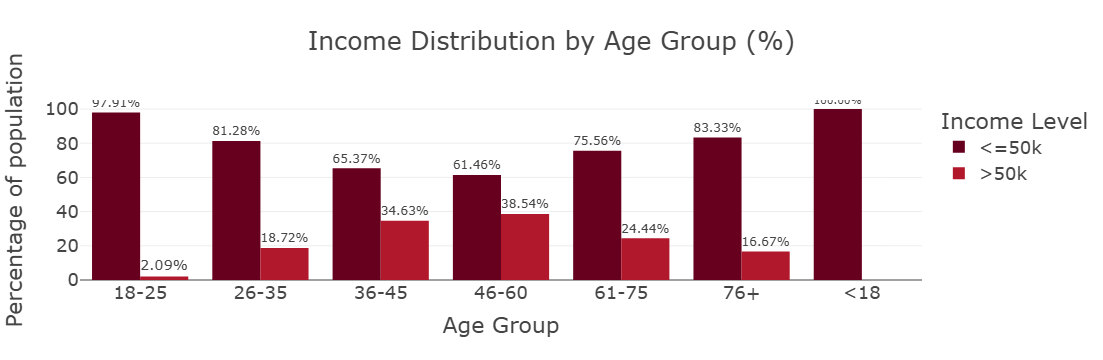

In [92]:
fig = px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color = 'income',
    title = 'Income Distribution by Age Group (%)',
    barmode = 'group', 
    height = 500,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text= 'percentage'
)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(template="presentation", xaxis_title='Age Group', 
                  yaxis_title='Percentage of population', legend_title=dict(text='Income Level'),
                  paper_bgcolor = "rgba(0, 0, 0, 0)", plot_bgcolor = "rgba(0, 0, 0, 0)")
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroup_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroup_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_agegroup_bar_plot.html'))

The bar chart visualizes the income distribution across age groups, using percentages within each group. There is an evident pattern in terms of income progression over the years with a gradual increase in terms of the number of people earning >50K starting from 0 amongst those aged 18 and below, peaking between 36 and 60 years, then declining after 60 years but not to zero.

All individuals under 18 earn <=50K, likely due to being students, minors, or ineligible for full-time employment. Extremely few young adults (2.1%) exceed 50K, as most are early in their careers, pursuing education, or in entry-level jobs. For the 26-35 age group, there's a noticeable improvement — roughly 1 in 5 individuals in this group earn >50K, reflecting early career progression and accumulation of qualifications/experience. A substantial income increase is seen in the 36-45 age group: over a third now earn >50K. This is typically considered prime earning age where individuals settle into stable, higher-paying positions. Highest proportion of >50K earners is seen amongst individuals aged between 46 and 60— nearly 4 in 10. This reflects career maturity, peak seniority levels, and accumulated experience. There's a drop-off in high incomes as many transition to retirement, part-time, or less demanding roles in the age group 61-75. Yet about 1 in 4 still earn >50K. Most in 76+ age group earn <=50K, likely due to retirement, pensions, or fixed incomes — but a small minority still earn higher incomes, possibly through continued work or investments.

## Income by Native Region

In [20]:
adult_df_income_reg = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_by_region').sort_values(['native_region', 'income'])
adult_df_income_reg

,native_region,income,total_by_region
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22768
7,north america,>50k,7250
8,other,<=50k,435
9,other,>50k,146


In [23]:
total_per_native_region = adult_df_income_reg.groupby('native_region')['total_by_region'].transform('sum')
adult_df_income_reg['percentage'] = (adult_df_income_reg['total_by_region']/total_per_native_region) *100
adult_df_income_reg

,native_region,income,total_by_region,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22768,75.847825
7,north america,>50k,7250,24.152175
8,other,<=50k,435,74.870912
9,other,>50k,146,25.129088


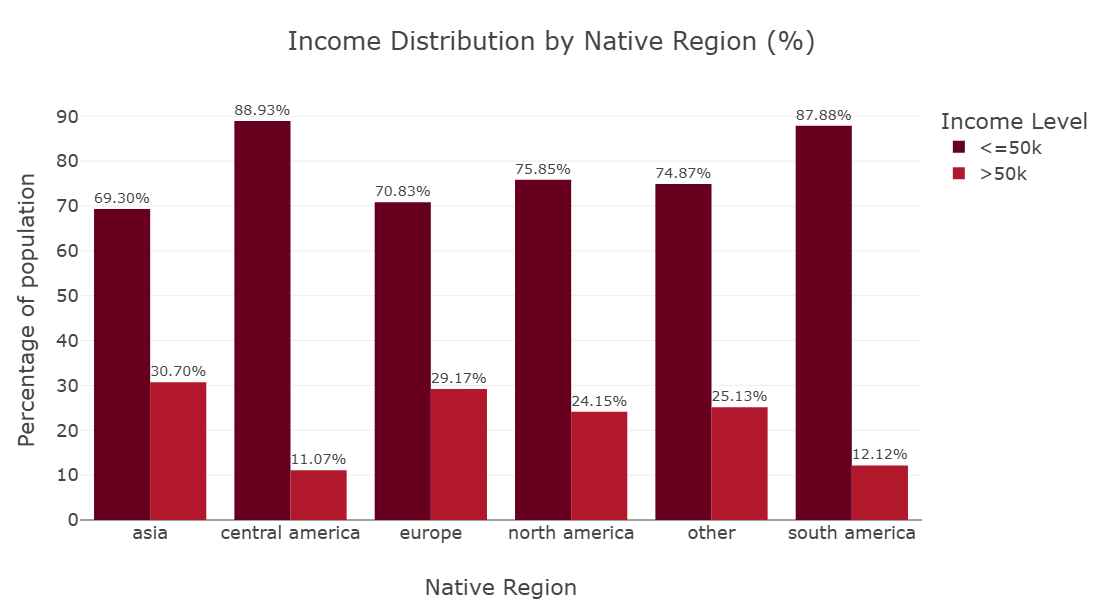

In [93]:
fig = px.bar(
    adult_df_income_reg,
    x = 'native_region',
    y = 'percentage',
    color = 'income',
    title = 'Income Distribution by Native Region (%)',
    barmode = 'group', 
    height = 600,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text= 'percentage'
)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(template="presentation", xaxis_title='Native Region', yaxis_title='Percentage of population', legend_title=dict(text='Income Level'),
                  xaxis_title_standoff=50, paper_bgcolor = "rgba(0, 0, 0, 0)", plot_bgcolor = "rgba(0, 0, 0, 0)")
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_nativeregion_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_nativeregion_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_nativeregion_bar_plot.html'))

Asia (30.7%) and Europe (29.2%) have the highest proportions of high-income earners. This suggests these immigrant groups might be better integrated into high-paying professional roles, or may represent a more skilled migrant profile in the dataset. Central America (11.1%) and South America (12.1%) have the lowest proportions of >50K earners. With 24.2% of North Americans earning >50K, this serves as a middle-ground baseline. Interestingly, both Asian and European groups outperform the native-born population proportionally in high-income brackets. The 'Other' group sits around 25.1%, close to North America’s rate. This likely reflects a diverse mix of regions not explicitly listed.

## Income by Race

In [32]:
adult_df_income_race = adult_df.groupby(['race', 'income']).size().reset_index(name='total_by_race').sort_values(['race', 'income'])
adult_df_income_race

,race,income,total_by_race
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20659
9,white,>50k,7112


In [35]:
total_per_race = adult_df_income_race.groupby('race')['total_by_race'].transform('sum')
adult_df_income_race['percentage'] = (adult_df_income_race['total_by_race']/total_per_race) *100
adult_df_income_race

,race,income,total_by_race,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20659,74.390551
9,white,>50k,7112,25.609449


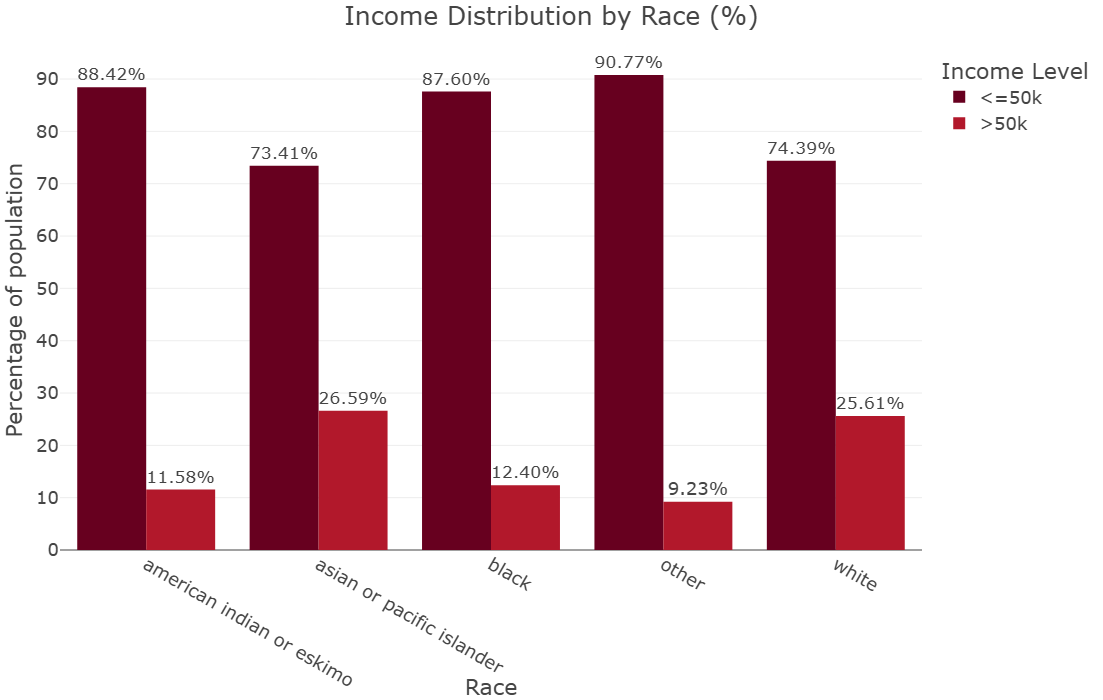

In [94]:
fig = px.bar(
    adult_df_income_race,
    x = 'race',
    y = 'percentage',
    color = 'income',
    title = 'Income Distribution by Race (%)',
    barmode = 'group', 
    height = 700,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text= 'percentage'
)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(template="presentation", xaxis_title='Race', yaxis_title='Percentage of population', legend_title=dict(text='Income Level'),
                  xaxis_title_standoff=30, margin=dict(l=60, r=50, t=50, b=150), paper_bgcolor = "rgba(0, 0, 0, 0)", plot_bgcolor = "rgba(0, 0, 0, 0)")
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_race_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_race_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_race_bar_plot.html'))

Asian or Pacific Islander (26.6%) and White (25.6%) populations have the highest proportions of >50K earners. Asians/Pacific Islanders marginally outperform Whites, a pattern often attributed to occupational concentration in high-paying sectors like technology and medicine. On the other hand, American Indian or Eskimo (11.6%), Black (12.4%), and Other (9.2%) groups show significantly lower rates of high-income earners. These figures reflect long-standing economic disparities rooted in historical exclusion, occupational segregation, and systemic inequality.

The stark differences in high-income proportions:

- **Between Whites and Blacks**: 25.6% vs 12.4% — slightly over double the proportion.
- **Between Asians and Others**: 26.6% vs 9.2% — nearly triple.

These disparities are consistent with well-documented wage gaps and underrepresentation of marginalized groups in higher-paying roles.

## Income by Education Level and Occupation Group

In [52]:
adult_df_income_edu_occ = (adult_df.groupby(['education_level', 'occupation_grouped', 'income'])
                           .size().reset_index(name='total').sort_values('total', ascending = False))
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total
29,secondary-school graduate,blue collar,<=50k,3976
56,tertiary,white collar,>50k,3545
55,tertiary,white collar,<=50k,3369
45,some college,white collar,<=50k,3003
36,secondary-school graduate,white collar,<=50k,2900
38,some college,blue collar,<=50k,1503
32,secondary-school graduate,service,<=50k,1444
20,secondary,blue collar,<=50k,1349
6,associate,white collar,<=50k,1015
41,some college,service,<=50k,902


In [53]:
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['education_level'] + " | "
                                     + adult_df_income_edu_occ['occupation_grouped'])
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total,edu_occ
29,secondary-school graduate,blue collar,<=50k,3976,secondary-school graduate | blue collar
56,tertiary,white collar,>50k,3545,tertiary | white collar
55,tertiary,white collar,<=50k,3369,tertiary | white collar
45,some college,white collar,<=50k,3003,some college | white collar
36,secondary-school graduate,white collar,<=50k,2900,secondary-school graduate | white collar
38,some college,blue collar,<=50k,1503,some college | blue collar
32,secondary-school graduate,service,<=50k,1444,secondary-school graduate | service
20,secondary,blue collar,<=50k,1349,secondary | blue collar
6,associate,white collar,<=50k,1015,associate | white collar
41,some college,service,<=50k,902,some college | service


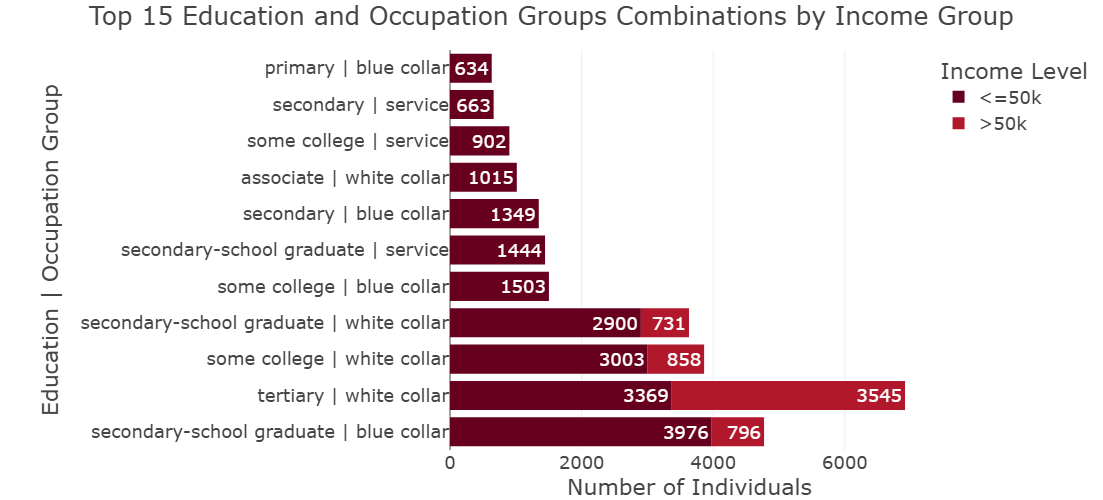

In [103]:
num = 15
adult_df_combos = adult_df_income_edu_occ.head(num)
fig = px.bar(
    adult_df_combos,
    x = 'total',
    y = 'edu_occ',
    color = 'income',
    orientation = 'h',
    title = f'Top {num} Education and Occupation Groups Combinations by Income Group',
    # barmode = 'group', 
    height = 500,
    width=1100,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text = 'total'
)
fig.update_layout(template="presentation", 
                  xaxis_title='Number of Individuals', 
                  yaxis_title='Education | Occupation Group', 
                  legend_title=dict(text='Income Level'),
                  margin=dict(l=450, r=50, t=50, b=50),
                  paper_bgcolor = "rgba(0, 0, 0, 0)", 
                  plot_bgcolor = "rgba(0, 0, 0, 0)")
fig.update_traces(textposition='inside')
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_eduandocc_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_eduandocc_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_eduandocc_bar_plot.html'))

From the bar chart, we can pick out the largest groups per income-level. We see that secondary-school graduates working a blue collar job occupy the largest group in the dataset (3976). This reflects a common socio-economic profile: individuals with basic schooling in manual or technical trades predominantly earning lower incomes. The largest high-income group are tertiary-educated individuals in white collar roles. This highlights the strong earning advantage conferred by higher education and skilled jobs.

Some of the key patterns we can get from the dataset are:

- **Education matters, but isn’t deterministic**

Tertiary education combined with white-collar work offers the highest income prospects. Yet a substantial number of tertiary-educated white-collar workers earn <=50K, likely early career, part-time, or structural pay gaps.

- **Blue-collar and service work predominantly pay <=50K, regardless of education.**

Even some college education doesn’t guarantee high incomes in these sectors. Manual and service sector income is highly occupation-dependent (some skilled trades can break the 50K mark).

- **Some non-tertiary education groups do reach >50K**

Secondary-school graduates in blue-collar and white-collar work have decent representation among >50K earners. This reflects upward mobility possible through skilled trades, tenure, or niche roles.
